## EyeClinic Inventory Recommendation Project

### Author: Naveen Roy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
data=pd.read_excel(r"C:\Users\navee\Desktop\eye_clinic.xlsx")

In [3]:
data

,CampCode,OrderDate,Camp Place Code,RtSph,LtSph,billdate
0,AYY1504489,2015-04-06,1,0.75,1.25,2015-04-23
1,AYY1504489,2015-04-06,1,0.00,0.00,2015-04-23
2,AYY1504489,2015-04-06,1,0.50,0.00,2015-04-23
3,AYY1504489,2015-04-06,1,0.00,0.00,2015-04-23
4,AYY1504489,2015-04-06,1,-1.00,-1.00,2015-04-23
...,...,...,...,...,...,...
20051,S.V1703971,2017-03-31,36,0.00,0.00,2017-03-31
20052,S.V1703971,2017-03-31,36,0.00,0.00,2017-03-31
20053,S.V1703971,2017-03-31,36,0.00,0.00,2017-03-31
20054,S.V1703971,2017-03-31,36,1.00,1.00,2017-03-31


## Check for Null Values


In [4]:
data.isna().sum()

CampCode             0
OrderDate            0
Camp Place Code      0
RtSph                0
LtSph                0
billdate           447
dtype: int64

In [5]:
data["billdate"]=data["billdate"].fillna(0)

In [6]:
data.isna().sum()

CampCode           0
OrderDate          0
Camp Place Code    0
RtSph              0
LtSph              0
billdate           0
dtype: int64

### Removing 'zero' values from dataset

In [7]:
data=data[data.RtSph !=0]
data=data[data.LtSph !=0]

In [8]:
data

,CampCode,OrderDate,Camp Place Code,RtSph,LtSph,billdate
0,AYY1504489,2015-04-06,1,0.75,1.25,2015-04-23 00:00:00
4,AYY1504489,2015-04-06,1,-1.00,-1.00,2015-04-23 00:00:00
6,AYY1504489,2015-04-06,1,-0.75,-1.25,2015-04-23 00:00:00
13,AYY1504489,2015-04-06,1,-0.75,-1.25,2015-04-23 00:00:00
18,AYY1504489,2015-04-06,1,1.50,1.50,2015-04-23 00:00:00
...,...,...,...,...,...,...
20041,S.V1703971,2017-03-31,36,-2.00,-2.00,2017-03-31 00:00:00
20043,S.V1703971,2017-03-31,36,2.00,2.00,2017-03-31 00:00:00
20047,S.V1703971,2017-03-31,36,1.00,1.00,2017-03-31 00:00:00
20050,S.V1703971,2017-03-31,36,1.50,2.00,2017-03-31 00:00:00


## counting the RtSph Types in dataset

In [9]:
data2=data.groupby(['RtSph']).size().reset_index(name='count Rtsph')
print (data2)

    RtSph  count Rtsph
0  -10.00            2
1   -9.00            3
2   -8.00            2
3   -7.50            2
4   -7.00            2
5   -6.75            1
6   -6.00            7
7   -5.50            3
8   -5.00           12
9   -4.50           12
10  -4.00           37
11  -3.75            3
12  -3.50           44
13  -3.25            2
14  -3.00           79
15  -2.75            6
16  -2.50          125
17  -2.25           30
18  -2.00          212
19  -1.75           67
20  -1.50          309
21  -1.25          125
22  -1.00          325
23  -0.75          272
24  -0.53            1
25  -0.50          248
26   0.50          587
27   0.70            1
28   0.75          648
29   1.00          912
30   1.25          370
31   1.50          627
32   1.75          135
33   2.00          270
34   2.25           48
35   2.50           75
36   2.75            7
37   3.00           26
38   3.25            3
39   3.50            7
40   4.00            3
41   5.00            1
42   7.00  

## Counting the LtSph  types in dataset

In [10]:
data3=data.groupby(['LtSph']).size().reset_index(name='count Ltsph')
print (data3)

    LtSph  count Ltsph
0  -16.00            1
1  -10.00            1
2   -9.00            4
3   -8.50            1
4   -8.00            2
5   -7.50            1
6   -6.75            1
7   -6.50            1
8   -6.00            5
9   -5.75            1
10  -5.50            3
11  -5.00            9
12  -4.75            1
13  -4.50           19
14  -4.00           29
15  -3.75            1
16  -3.50           40
17  -3.25            5
18  -3.00           77
19  -2.75           11
20  -2.50          138
21  -2.25           35
22  -2.00          179
23  -1.75           58
24  -1.50          295
25  -1.25          135
26  -1.00          336
27  -0.76            1
28  -0.75          245
29  -0.70            1
30  -0.50          273
31  -0.25            2
32  -0.10            1
33   0.25            1
34   0.50          650
35   0.56            1
36   0.75          706
37   1.00          878
38   1.25          361
39   1.50          583
40   1.75          135
41   2.00          244
42   2.25  

### Making a table containg total eye lenses in the given dataset

In [11]:
Quantity=data2["count Rtsph"]+data3["count Ltsph"]
if len(data2)>len(data3):
    Type=data2["RtSph"]
else:
    Type=data3["LtSph"]

In [12]:
eyelens=pd.DataFrame({"Type (Sph)":Type,"Quantity":Quantity})
eyelens["Quantity"]=eyelens["Quantity"].fillna(7)
eyelens

,Type (Sph),Quantity
0,-16.00,3.0
1,-10.00,4.0
2,-9.00,6.0
3,-8.50,3.0
4,-8.00,4.0
5,-7.50,2.0
6,-6.75,8.0
7,-6.50,4.0
8,-6.00,17.0
9,-5.75,13.0


## Visualizing the dataset

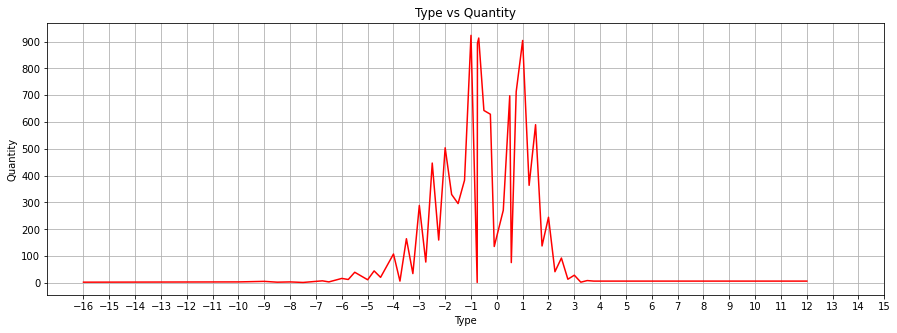

In [13]:
plt.figure(figsize=(15,5))
plt.plot(eyelens["Type (Sph)"],eyelens["Quantity"],color='r')
plt.title("Type vs Quantity")
plt.xlabel("Type")
plt.ylabel("Quantity")
plt.xticks(np.arange(-16,16,1))
plt.yticks(np.arange(0,1000,100))
plt.grid()
plt.show()

## Splitting the data for training and testing

In [14]:
x=eyelens
y=eyelens['Quantity']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

## Using different Regression models to find the best model that gives more accuracy

## Decision Tree Regressor

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score 
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(x_train,y_train)
dtr_pred=dtr.predict(x_test)

In [17]:
r2_dtr = r2_score(y_test,dtr_pred) 
print('r2 score is', r2_dtr) 

r2 score is 0.998682703814993


In [18]:
df=pd.DataFrame({"Actual":y_test,"Predicted":dtr_pred})
df

,Actual,Predicted
32,136.0,138.0
47,9.0,8.0
49,7.0,7.0
9,13.0,12.0
15,7.0,7.0
8,17.0,21.0
43,93.0,78.0
44,14.0,12.0
26,923.0,893.0
41,245.0,271.0


## RandomForestRegressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100)
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)

In [20]:
r2_rfr = r2_score(y_test,rfr_pred) 
print('r2 score is', r2_rfr)

r2 score is 0.9895606463334796


In [21]:
df=pd.DataFrame({"Actual":y_test,"Predicted":rfr_pred})
df

,Actual,Predicted
32,136.0,143.33
47,9.0,7.37
49,7.0,7.01
9,13.0,10.62
15,7.0,7.24
8,17.0,18.23
43,93.0,99.94
44,14.0,11.01
26,923.0,846.54
41,245.0,290.95


## KNeighborsRegressor

In [22]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor()
knn.fit(x_train, y_train)
knn_pred=knn.predict(x_test)

In [23]:
r2_knn = r2_score(y_test,knn_pred) 
print('r2 score is', r2_knn) 

r2 score is 0.9677228692226494


In [24]:
df=pd.DataFrame({"Actual":y_test,"Predicted":knn_pred})
df

,Actual,Predicted
32,136.0,129.8
47,9.0,6.2
49,7.0,6.2
9,13.0,10.2
15,7.0,6.4
8,17.0,10.2
43,93.0,82.2
44,14.0,8.0
26,923.0,750.4
41,245.0,270.2


## LinearRegression

In [25]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression() 
lr.fit(x_train, y_train)  
lr_pred = lr.predict(x_test)

In [26]:
r2_lr = r2_score(y_test,lr_pred) 
print('r2 score is', r2_lr) 

r2 score is 1.0


In [27]:
df=pd.DataFrame({"Actual":y_test,"Predicted":lr_pred})
df

,Actual,Predicted
32,136.0,136.0
47,9.0,9.0
49,7.0,7.0
9,13.0,13.0
15,7.0,7.0
8,17.0,17.0
43,93.0,93.0
44,14.0,14.0
26,923.0,923.0
41,245.0,245.0


## Ridge Regression

In [28]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)
ridge_pred=ridge.predict(x_test)

In [29]:
r2_ridge = r2_score(y_test,ridge_pred) 
print('r2 score is', r2_ridge) 

r2 score is 0.9999999999998528


In [30]:
df=pd.DataFrame({"Actual":y_test,"Predicted":ridge_pred})
df

,Actual,Predicted
32,136.0,136.000023
47,9.0,9.000075
49,7.0,7.000077
9,13.0,13.000065
15,7.0,7.000069
8,17.0,17.000063
43,93.0,93.000042
44,14.0,14.000073
26,923.0,922.999721
41,245.0,244.999984


### Looks like Ridge and Linear Regression are giving the best score 

### Im choosing Ridge for this project for futher analysis

In [31]:
df2=pd.DataFrame({"Model":["LinearRegression","DecisionTreeRegressor","RandomForrestRegressor","KNeigboursRegressor","Ridge Regression"],"R2 Score":[r2_lr,r2_dtr,r2_rfr,r2_knn,r2_ridge]})
df2

,Model,R2 Score
0,LinearRegression,1.000000
1,DecisionTreeRegressor,0.998683
2,RandomForrestRegressor,0.989561
3,KNeigboursRegressor,0.967723
4,Ridge Regression,1.000000


## Predicting the whole dataset using Ridge Regression

In [32]:
Quantity=ridge.predict(x)
Type=["","-10.00 sph","-9.00 sph","-8.50 sph","-8.00 sph","-7.50 sph","-6.75 sph","-6.50 sph","-6.00 sph","-5.75 sph","-5.50 sph","-5.00 sph","-4.75 sph","-4.50 sph","-4.00 sph","-3.75 sph","-3.50 sph","-3.25 sph","-3.00 sph","-2.75 sph","-2.50 sph","-2.25 sph","-2.00 sph","-1.75 sph","-1.50 sph","-1.25 sph","-1.00 sph","-0.76 sph","-0.75 sph","-0.70 sph","-0.50 sph","-0.25 sph","-0.10 sph","0.25 sph","0.50 sph","0.56 sph","0.75 sph","1.00 sph","1.25 sph","1.50 sph","1.75 sph","2.00 sph","2.25 sph","2.50 sph","2.75 sph","3.00 sph","3.25 sph","3.50 sph","3.75 sph","4.00 sph","5.00 sph","8.00 sph","10.00 sph","10.50 sph","11.00 sph","12.00 sph"]
eyes=pd.DataFrame({"Type (sph)":Type,"Quantity":Quantity})
eyes

,Type (sph),Quantity
0,,3.000058
1,-10.00 sph,4.000064
2,-9.00 sph,6.000064
3,-8.50 sph,3.000066
4,-8.00 sph,4.000066
5,-7.50 sph,2.000067
6,-6.75 sph,8.000065
7,-6.50 sph,4.000067
8,-6.00 sph,17.000063
9,-5.75 sph,13.000065


### The task is to find recomendation of no.of lenses needed for the inventory per day
#### so im filtering out orders given on one day by using boolean method

In [33]:
date1=data[(data['OrderDate']=='21-03-16')]
date1

,CampCode,OrderDate,Camp Place Code,RtSph,LtSph,billdate
9748,THI1603464,2016-03-21,229,0.50,0.5,2016-06-08 00:00:00
9750,THI1603464,2016-03-21,229,1.50,1.5,2016-06-08 00:00:00
9753,THI1603464,2016-03-21,229,-4.00,-3.5,2016-06-08 00:00:00
9756,THI1603464,2016-03-21,229,0.50,0.5,2016-06-03 00:00:00
9758,THI1603464,2016-03-21,229,1.50,1.5,2016-06-03 00:00:00
...,...,...,...,...,...,...
10023,THI1603464,2016-03-21,229,-3.00,-3.5,2016-06-04 00:00:00
10026,THI1603464,2016-03-21,229,-2.00,-1.0,2016-06-04 00:00:00
10027,THI1603464,2016-03-21,229,1.25,0.5,2016-06-04 00:00:00
10031,THI1603464,2016-03-21,229,0.50,0.5,2016-06-08 00:00:00


## counting the number of RtSph and LtSph from the single day filtered above

In [34]:
date1_Rtsph=date1.groupby(['RtSph']).size().reset_index(name='count Rtsph')
print (date1_Rtsph)

    RtSph  count Rtsph
0   -9.00            2
1   -7.50            1
2   -5.00            1
3   -4.50            2
4   -4.00            3
5   -3.50            2
6   -3.00            2
7   -2.75            2
8   -2.50            1
9   -2.00            4
10  -1.75            2
11  -1.50            6
12  -1.25            2
13  -1.00            6
14  -0.75            2
15  -0.53            1
16  -0.50            4
17   0.50           19
18   0.75            9
19   1.00            7
20   1.25            8
21   1.50           17
22   2.00            3
23   2.50            1
24   3.00            1


In [35]:
date1_Ltsph=date1.groupby(['LtSph']).size().reset_index(name='count Ltsph')
print (date1_Ltsph)

    LtSph  count Ltsph
0  -16.00            1
1   -9.00            1
2   -7.50            1
3   -5.75            1
4   -5.00            1
5   -4.50            2
6   -4.00            1
7   -3.50            4
8   -3.00            1
9   -2.75            1
10  -2.50            2
11  -2.00            2
12  -1.50            5
13  -1.25            2
14  -1.00            9
15  -0.75            4
16  -0.50            4
17   0.50           19
18   0.75           10
19   1.00           12
20   1.25            4
21   1.50           17
22   2.00            1
23   2.50            2
24   3.00            1


## Creating a table for getting the total number of lenses

In [36]:
Quantity=date1_Rtsph["count Rtsph"]+date1_Ltsph["count Ltsph"]

if len(date1_Rtsph)>len(date1_Ltsph):
    Type=date1_Rtsph["RtSph"]
else:
    Type=date1_Ltsph["LtSph"]
    
inventory=pd.DataFrame({"Type":Type,"Quantity":Quantity})
inventory["Quantity"]=inventory["Quantity"].fillna(2)
inventory

,Type,Quantity
0,-16.00,3
1,-9.00,2
2,-7.50,2
3,-5.75,3
4,-5.00,4
5,-4.50,4
6,-4.00,3
7,-3.50,6
8,-3.00,2
9,-2.75,5


## Training and Splitting the data

In [37]:
x1=inventory

### Ridge Regression

#### We have already created a Ridge Regression model above which has been trained for the whole dataset. im using that same model to predict the Recomendation of lens needed per day.

In [38]:
ridge_pred=ridge.predict(x1)

## Final Dataset 

### Inventory needed for one day(21-03-2016)

In [39]:
Quantity=ridge.predict(x1)
Type=["-16.00 sph","-9.00 sph","-7.50 sph","-5.75 sph","-5.00 sph","-4.50 sph","-4.00 sph","-3.50 sph","-3.00 sph","-2.75 sph","-2.50 sph","-2.00 sph","-1.50 sph","-1.25 sph","-1.00 sph","-0.75 sph","-0.50 sph","0.50 sph","0.75 sph","1.00 sph","1.25 sph","1.50 sph","2.00 sph","2.50 sph","3.00 sph"]
inventory=pd.DataFrame({"Type (sph)":Type,"Quantity (Per Day)":Quantity})
inventory

,Type (sph),Quantity (Per Day)
0,-16.00 sph,3.000058
1,-9.00 sph,2.000065
2,-7.50 sph,2.000067
3,-5.75 sph,3.000068
4,-5.00 sph,4.000069
5,-4.50 sph,4.000069
6,-4.00 sph,3.000070
7,-3.50 sph,6.000069
8,-3.00 sph,2.000072
9,-2.75 sph,5.000071


#### Exporting to CSV

In [41]:
inventory.to_csv(r"C:\Users\navee\Desktop\final_output.csv")